# CLASSIFICATION MODEL OF CUSTOMER CHURN PREDICTION 

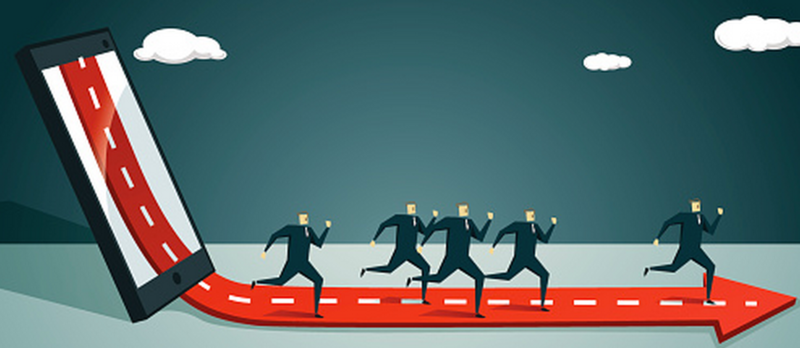

# Introduction

Customer churn is  when customers or subscribers discontinue doing business with a firm or service.
To be simple, it is when customers stops being your customer.

Telco churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 California customers in the third quarter. Which customers have left, stayed, or signed up for their service shows?

Goal:To apply machine learning models to predict churn on an individual customer basis and take counter measures such as discounts, special offers or other gratifications to keep their customers.Moreover,the ultimate goal is to expand its coverage area and retrieve more customers loyalty.

# Installation

In [2]:
!pip install category_encoders

In [3]:
!pip install threadpoolctl==3.1.0

In [4]:
!pip install --upgrade scipy

In [5]:
!pip install -U imbalanced-learn

In [6]:
!pip install xgboost

# Importation

In [7]:
# Data handling
import pandas as pd
import numpy as np
import threadpoolctl
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )

# Statistics
from scipy import stats

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from collections import Counter

# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from statistics import stdev
from sklearn.model_selection import KFold

# Other packages
import os, pickle

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [8]:
data = pd.read_csv('Telco-Customer-Churn.csv')

# Exploratory Data Analysis

## Hypothesis

H0: The sample has a Gaussian distribution in the numerical feautures.

H1: The sample does not have a Gaussian distribution in the numerical feautures.

## Questions

1. Does longer tenure increase churn?
2. Is there any pattern in Customer Churn based on gender?
3. Which type of contract keeps more customers?
4. What's the most profitable Internetservice type

## Issues with the data

1. Some of the columns are irrelevant.
2. some of the columns are not in their respective data types.
3. The data values in the column payments method needs is not good for readability.
4. The data has missing values

## Solutions

1. Drop irrelevant columns
2. Replace the correct data types in their respective columns
3. Rename the data values for better readability.


In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.shape

(7043, 21)

In [10]:
# summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [12]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# Check of outliers by applying the IQR method checking
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
df = data[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()


MonthlyCharges    False
TotalCharges      False
tenure            False
dtype: bool

The results above showed there are no outliers

1. Drop irrelevant columns

the customerID needs to be drop

In [16]:
data = data.drop(['customerID'], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. Replace the correct data types in their respective columns

In [17]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
 

3. Rename the data values for better readability.

In [18]:
payment_column = {'Electronic check : E-Check', 'Mailed check : Mailed Check', 'Bank transfer (automatic) : Bank Tranfer',
       'Credit card (automatic) : Credit Card'}
data['PaymentMethod'].replace(payment_column, inplace = True)               

In [19]:
# check for missing values after converting TotalCharges to numeric
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Bivariate Analysis

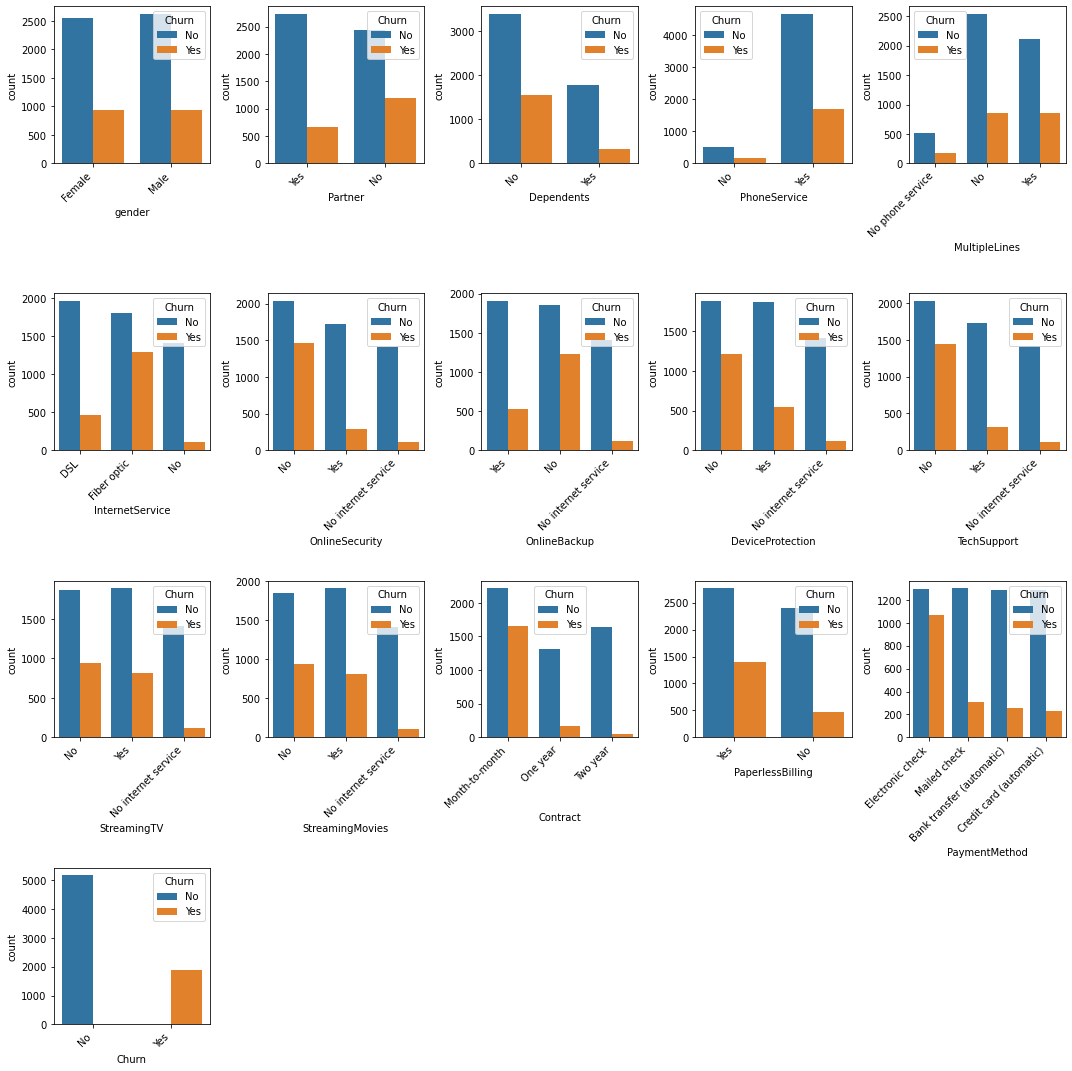

In [20]:

# Setup figure
cols = 5
rows = 4
fig = plt.figure(figsize= (15,15))

# Plotting
all_categorics = data.select_dtypes(include='object')
categoric_columns = all_categorics.columns[all_categorics.nunique()<5]
for i, col in enumerate(categoric_columns):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=data[col], hue='Churn', data=data, ax=ax)    
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()  
plt.show()
     


Observations:

 Gender is not affecting the churn.

 Customers who are more likely to churn:
1. who doesn't have partner
2. who doesn't have dependants
3. who has phone service
4. who use fiber optic as internet service
5. who didn't subscibe to any extra services (Online Backup, Online Security, etc)
6. who has contract month-to-month basis
7. who chose Paperless Billing
8. who use Electronic check

## Multivariate Analysis

<AxesSubplot:xlabel='tenure', ylabel='Count'>

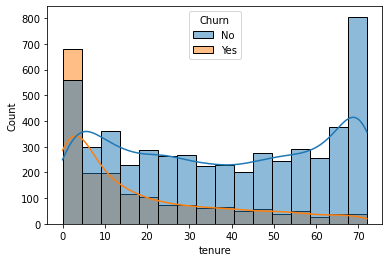

In [21]:
sns.histplot(data=data,
            x='tenure',
            hue='Churn', alpha=0.5, kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

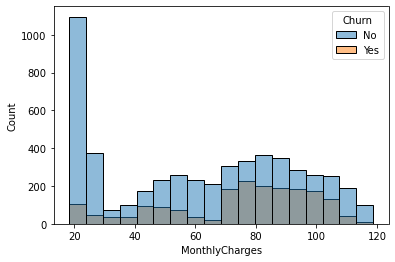

In [22]:
sns.histplot(data=data,
            x='MonthlyCharges',
            hue='Churn', alpha=0.5)

<AxesSubplot:>

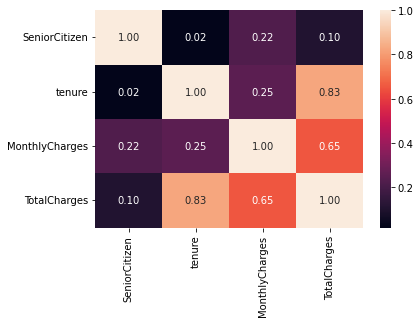

In [23]:
# correlation heatmap df
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Tenure is highly correlated to TotalCharges but not to MonthlyCharges. 

However MonthlyCharges and TotalCharges are somehow correlated to each other but the correlation value is less than 0.8.

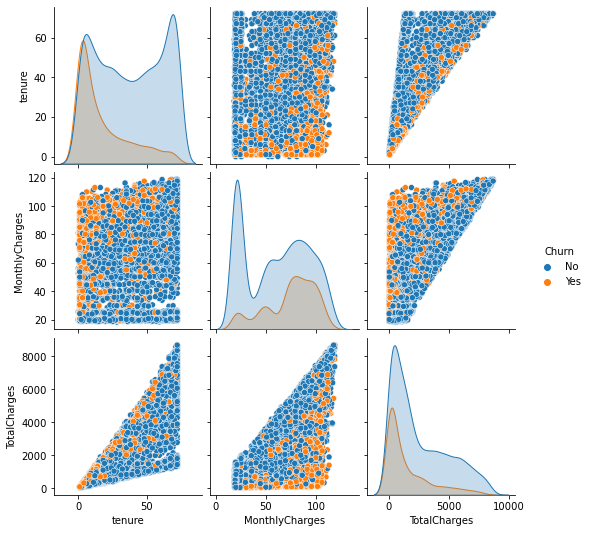

In [24]:
sns.pairplot(data,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

Observations:

Customer that has shorter time subscribe the service (smaller tenure) most likely to churn.

Customer with lower MonthlyCharges is most likely to stay, and the higher Monthly Charges is most likely to churn.
 
Interestingly, customers with lower TotalCharges is most likely to churn.

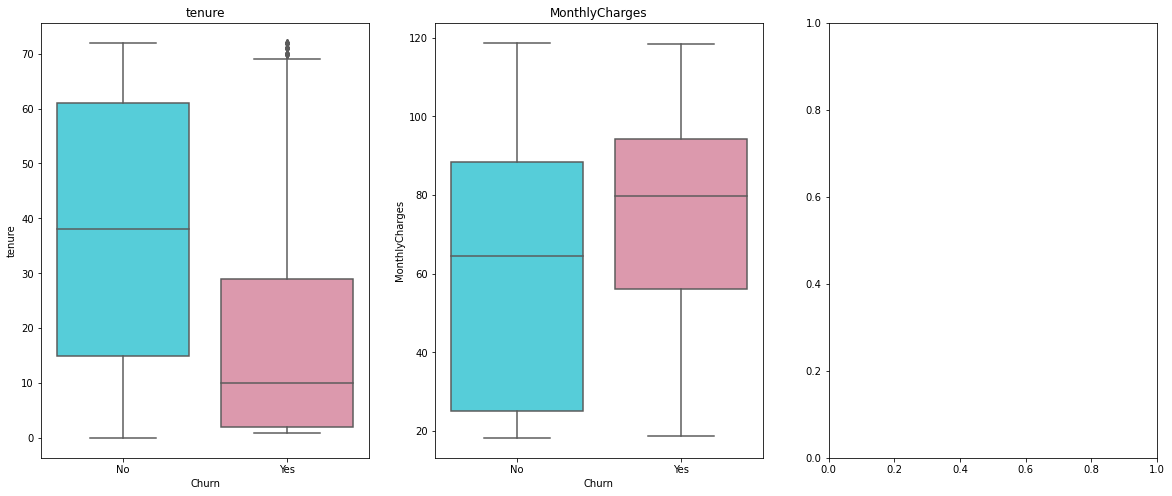

In [25]:
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Churn']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True ]
continues_features = [x for x in all_features if x not in categorical_features]
color = ('#40DFEF', '#E78EA9')
fig, ax = plt.subplots(1, 3, figsize=(20,8))
for i, p in enumerate(continues_features) :
        sns.boxplot(data=data, x='Churn', y=p, ax=ax[i], palette= color)
        ax[i].set_title(p)


Churning customers have much lower tenure  median  compared to a median of non-churners

Churning customers have higher monthly median charges and much lower interquartile range compared to that of non-churners



## Hypothesis validation

## Statistical Normality Tests

Normality tests are used to determine if a dataset is normally distributed about the mean value. it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.

on the other hand, Gaussian distribution is a continuous probability distribution with symmetrical sides around its center. Its mean, median and mode are equal.

Popular normality tests - D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .

There are three numerical features in this dataset - MonthlyCharges , Tenure, and TotalCharges.

### D’Agostino’s K^2 Test

### MonthlyCharges

In [26]:
stat, p = stats.normaltest(data['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=11419.52879, p=0.000
Sample does not look Gaussian (reject H0)


### Tenure

In [27]:
stat, p = stats.normaltest(data['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=76258.50517, p=0.000
Sample does not look Gaussian (reject H0)


### Anderson-Darling

TotalCharges

In [28]:
result = stats.anderson(data['TotalCharges'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: nan
Significance level 15.00 % : critical value 0.576, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.656, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.787, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


p-value is 0.00(<0.05) meaning the sample does not have Gaussian distribution in the numerical feautures.

## Anwering Questions

## 1. Does longer tenure increase churn?
customers with longer tenure have less churn rate.

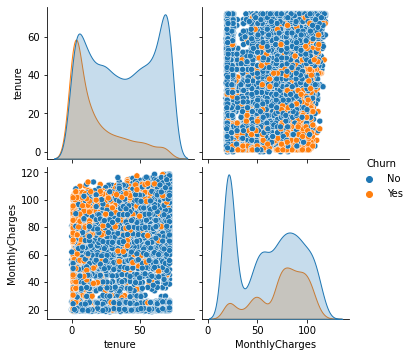

In [29]:
sns.pairplot(data,vars = ['tenure','MonthlyCharges'], hue="Churn")

## 2. Is there any pattern in Customer Churn based on gender?
The plot below shows that churn for both genders is very similar.

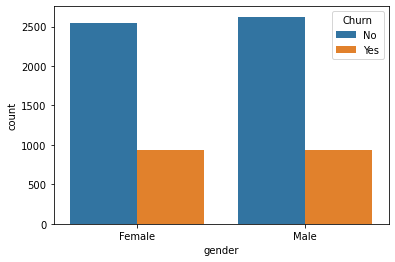

In [30]:
sns.countplot(data = data, 
              x = 'gender', 
              hue = 'Churn')
plt.show()

## 3. Which type of contract keeps more customers?
Churn rate for month-to-month contracts much higher that for other contract durations.

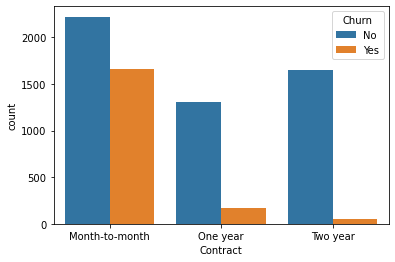

In [31]:
sns.countplot(data = data, 
              x = 'Contract', 
              hue = 'Churn')
plt.show()

## 4. What's the most profitable Internetservice type
FiberOptic InternetService keeps more customers

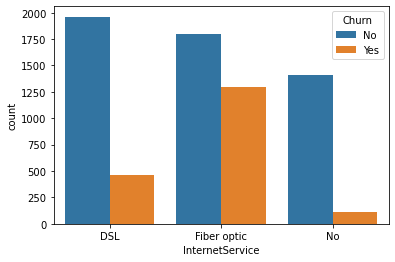

In [32]:
sns.countplot(data = data, 
              x = 'InternetService', 
              hue = 'Churn')
plt.show()

# Feature Processing & Engineering

## Drop Duplicates

In [33]:
data.duplicated().sum()


22

In [34]:
dup = data.loc[data.duplicated(),:]
dup.head(22)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [35]:
# Use pandas.DataFrame.drop_duplicates method
data.drop_duplicates(keep='first', inplace=True)

## Creating new features
Some columns are related to each other, so we'll add them together to avoid having unnecessary features

In [36]:
data["PhoneService"] = data.apply(lambda x: 
                                  "MultipleLines" 
                                  if x['MultipleLines'] == 'Yes' and x['PhoneService'] == 'Yes'
                                  else 
                                  "SingleLine" 
                                  if x['MultipleLines'] == 'No' and x['PhoneService'] == 'Yes'
                                  else 
                                  "None", 
                                  axis=1
                                  )
data['PhoneService'].unique()

array(['None', 'SingleLine', 'MultipleLines'], dtype=object)

In [37]:
data["StreamingService"] = data.apply(lambda x: 
                                  "FullService" 
                                  if x['StreamingTV'] == 'Yes' and x['StreamingMovies'] == 'Yes'
                                  else 
                                  "TV" 
                                  if x['StreamingTV'] == 'Yes' and x['StreamingMovies'] == 'No'
                                  else 
                                  "Movies" 
                                  if x['StreamingTV'] == 'No' and x['StreamingMovies'] == 'Yes'
                                  else 
                                  "None", 
                                  axis=1
                                  )
data["StreamingService"].unique()

array(['None', 'FullService', 'TV', 'Movies'], dtype=object)

In [38]:
data["SecurityService"] = data.apply(lambda x: 
                                  "FullSecurity" 
                                  if x['OnlineSecurity'] == 'Yes' and x['DeviceProtection'] == 'Yes'
                                  else 
                                  "OnlineSecurity" 
                                  if x['OnlineSecurity'] == 'Yes' and x['DeviceProtection'] == 'No'
                                  else 
                                  "DeviceProtection" 
                                  if x['OnlineSecurity'] == 'No' and x['DeviceProtection'] == 'Yes'
                                  else
                                  "None", 
                                  axis=1
                                  )
data["SecurityService"].unique()

array(['None', 'FullSecurity', 'OnlineSecurity', 'DeviceProtection'],
      dtype=object)

In [39]:
#drop the original features
drop_features = ['MultipleLines', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'DeviceProtection']
data.drop(drop_features, axis=1, inplace=True)

## Dataset Splitting

## Impute Missing Values

In [40]:
# Drop the missing rows
data = data.dropna(subset = ['TotalCharges'])

In [41]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineBackup        0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
StreamingService    0
SecurityService     0
dtype: int64

In [42]:
le = LabelEncoder()
df=data
df[['Churn']] = df[['Churn']].apply(le.fit_transform) # Applying LabelEncoder to 'Churn' column

X = df.drop('Churn', axis=1)
y = df['Churn']

## Data Imbalance Check

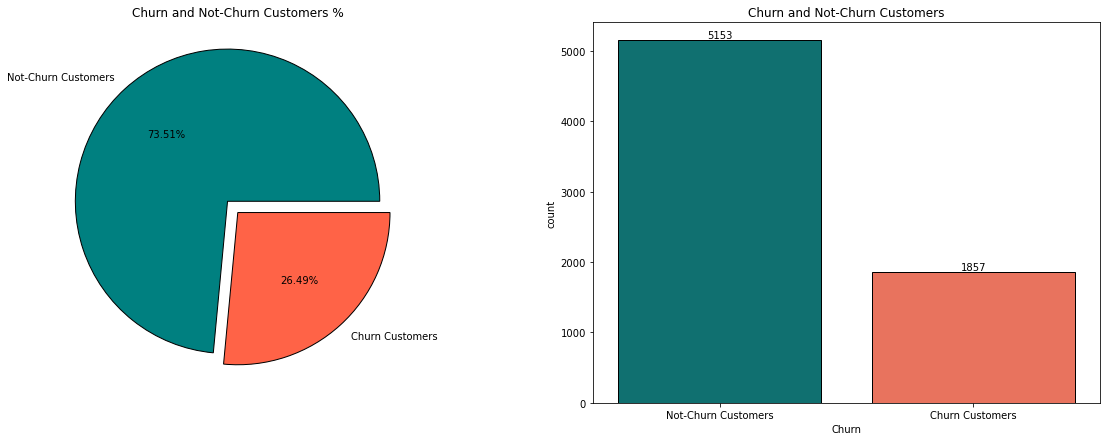

In [43]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

l1 = list(data['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Not-Churn Customers','Churn Customers'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Churn and Not-Churn Customers %');

plt.subplot(1,2,2)
ax = sns.countplot(data = data, 
                   x='Churn',
                   palette = palette, 
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Churn and Not-Churn Customers')
plt.show()


Dataset is imbalanced with almost 1:4 ratio. but it's still significant.

This means that a blind guess (on "Not-Churn") would give us accuracy of 73,51%

Therefore, we can't use Accuracy Score to choose our model

what to do to solve this issue:

1. We could use stratified splitting during train-test split (split the dataset in a way that preserves the same proportions of examples in each class.)
2. We could be extra careful when dealing with outliers (we can delete meaningull information).
3. Resampling Techniques — Oversample minority class or Undersample majority class.

In [44]:
#Oversampling the minority class (the churn customers)
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Samples are : 10306
Original dataset shape Counter({0: 5153, 1: 1857})
Resampled dataset shape Counter({0: 5153, 1: 5153})


Now our data is balanced

# Dataset Splitting

In [119]:
#stratify = y if y.dtype == "O" else None
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.20, random_state = 42)

# we used stratify for features imbalance
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

In [120]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((8244, 16), (2062, 16), (8244,), (2062,))

# Features Encoding

In [121]:
# Create both numerical and categorical columns
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns.remove('Churn') # Excluding 'Churn'

Let's use OneHotEncoder to encode the categorical columns except churn for which we already used labelEncoder

use drop='first' to handle multicollinearity that we mentioned earlier

we want our output to be a DataFrame instead of setting it manually (sklearn version 1.2.1)

In [122]:
# calling our encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop="first")
# setting output to DataFrame
encoder.set_output(transform="pandas")
# encoding our data
X_catEncoded_train = encoder.fit_transform(X_train[categoric_columns])

Encoding our test data with the same steps

In [123]:
# encoding our test data
X_catEncoded_test = encoder.transform(X_test[categoric_columns])

# Features Scaling


In [124]:
Scaler = StandardScaler().fit(X_train[numeric_columns]).set_output(transform="pandas")

X_numScaled_train = Scaler.transform(X_train[numeric_columns])
X_numScaled_test = Scaler.transform(X_test[numeric_columns])

joining cat with num

In [125]:
X_train = pd.concat([X_numScaled_train, X_catEncoded_train], axis=1)
X_test = pd.concat([X_numScaled_test, X_catEncoded_test], axis=1)

In [126]:
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_None,PhoneService_SingleLine,InternetService_Fiber optic,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingService_Movies,StreamingService_None,StreamingService_TV,SecurityService_FullSecurity,SecurityService_None,SecurityService_OnlineSecurity
591,1.472798,0.546970,1.564017,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
221,1.807796,-1.499351,-0.093879,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8288,-0.997811,-0.783574,-0.849518,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7897,-0.704688,-1.666539,-0.841317,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7467,-1.081561,-0.633801,-0.887417,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.054051,-1.670023,-0.456643,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5191,1.054051,-0.255885,0.526939,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,1.514673,1.086850,1.997509,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,-0.327816,0.203884,-0.265930,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Machine Learning Modeling

1. Logistic Regression
2. RandomForest Classifier
3. XGBoost Classifier
4. K Nearest Neighbors
5. Support Vector Machines 
6. DecisionTreeClassifier


## 1.  Logistic Regression

### Create the Model

In [127]:
model= LogisticRegression()

### Train the Model

In [128]:
model=model.fit(X_train, y_train)


###  Predict on the test dataset

In [129]:
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]


### Model Evaluation

In [130]:
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

f2_lgt = fbeta_score(y_test, pred, beta=2, average='binary')
print("f2_score :", f2_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)
     

recall_score :  0.7933723196881092
precision_score : 0.7427007299270073
f1_score : 0.767200754005655
f2_score : 0.7826923076923078
accuracy_score : 0.7604267701260912
ROC_AUC Score: 0.76161951610222


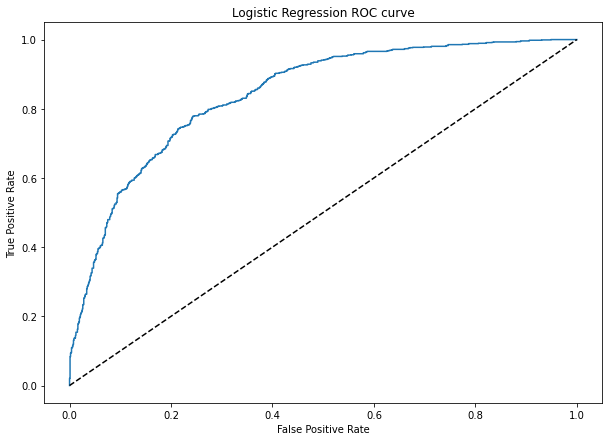

In [131]:
# plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 2. RandomForest Classifier

### Create the Model

In [132]:
RF_model= RandomForestClassifier()

### Train the Model

In [133]:
RF_model= RF_model.fit(X_train, y_train)

### Predict on the test dataset

In [134]:
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [207]:
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)


f2_rf = fbeta_score(y_test, rf_pred, beta=2, average='binary')
print("f2_score :", f2_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)
     

recall_score :  0.9512670565302144
precision_score : 0.8614298323036187
f1_score : 0.904122278832793
f2_score : 0.9318312010693144
accuracy_score : 0.899612027158099
ROC_AUC Score: 0.9038042595317878


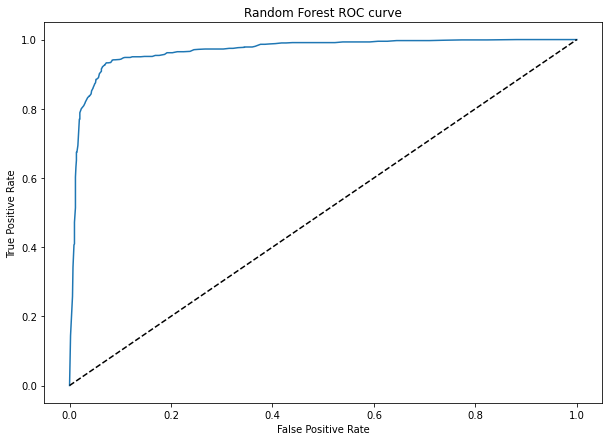

In [136]:
# plot the model evaluation
fig, ax = plt.subplots(figsize=(10,7))
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 3. XGBoost Classifier

### Create the Model

In [137]:
XG_model= XGBClassifier()

### Train the Model

In [138]:
XG_model= XG_model.fit(X_train, y_train)

### Predict on the test dataset

In [139]:
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [140]:
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

f2_XG = fbeta_score(y_test, XG_pred, beta=2, average='binary')
print("f2_score :", f2_XG)


A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)
     

recall_score :  0.928849902534113
precision_score : 0.8145299145299145
f1_score : 0.8679417122040073
f2_score : 0.903488813045127
accuracy_score : 0.8593598448108632
ROC_AUC Score: 0.8663456747537465


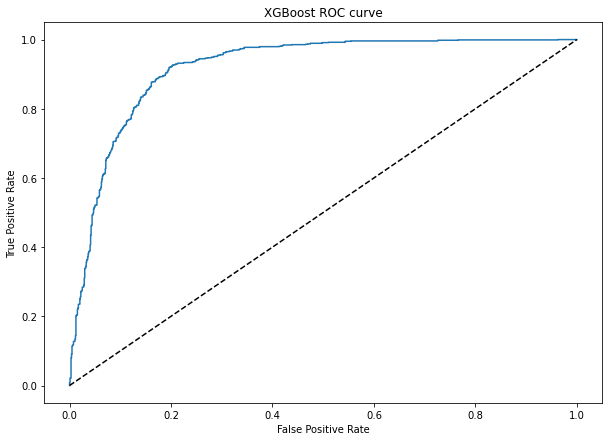

In [141]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, XG_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 4. K Nearest Neighbors


### Create the Model

In [142]:
KNN_model = KNeighborsClassifier()


### Train the Model

In [143]:
KNN_model = KNN_model.fit(X_train, y_train)

### Predict on the test dataset

In [144]:
KNN_pred = KNN_model.predict(X_test)
KNN_prob = KNN_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [145]:
r_KNN= recall_score(y_test, KNN_pred)
print("recall_score : ", r_KNN)

p_KNN= precision_score(y_test, KNN_pred)
print("precision_score :",p_KNN)

f1_KNN= f1_score(y_test, KNN_pred)
print("f1_score :", f1_KNN)

f2_KNN = fbeta_score(y_test, KNN_pred, beta=2, average='binary')
print("f2_score :", f2_KNN)


A_KNN= accuracy_score( y_test, KNN_pred)
print("accuracy_score :", A_KNN)

acu_KNN = roc_auc_score(KNN_pred, y_test)
print("ROC_AUC Score:",acu_KNN)

recall_score :  0.8645224171539961
precision_score : 0.7354892205638475
f1_score : 0.7948028673835126
f2_score : 0.8352165725047082
accuracy_score : 0.7778855480116392
ROC_AUC Score: 0.786553021496877


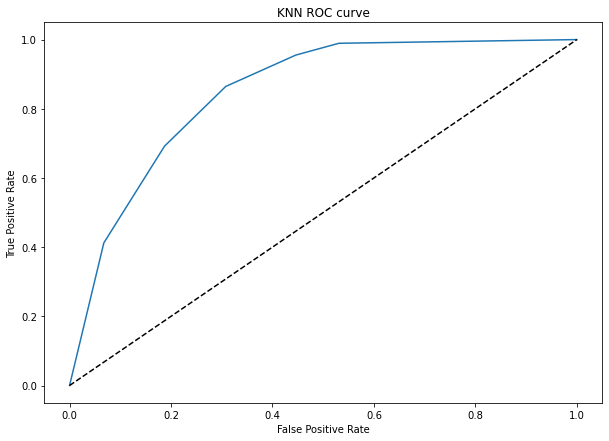

In [146]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, KNN_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 5. Support Vector Machines

### Create the Model

In [147]:
SVC_model = SVC(kernel='rbf',
                C=51,
                gamma=1,
                probability=True)

### Train the Model

In [148]:
SVC_model = SVC_model.fit(X_train, y_train)

### Predict on the test dataset

In [149]:
SVC_pred = SVC_model.predict(X_test)
SVC_prob = SVC_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [150]:
r_SVC= recall_score(y_test, SVC_pred)
print("recall_score : ", r_SVC)

p_SVC= precision_score(y_test, SVC_pred)
print("precision_score :",p_SVC)

f1_SVC= f1_score(y_test, SVC_pred)
print("f1_score :", f1_SVC)

f2_SVC = fbeta_score(y_test, SVC_pred, beta=2, average='binary')
print("f2_score :", f2_SVC)


A_SVC= accuracy_score( y_test, SVC_pred)
print("accuracy_score :", A_SVC)

acu_SVC = roc_auc_score(SVC_pred, y_test)
print("ROC_AUC Score:",acu_SVC)

recall_score :  0.9230019493177388
precision_score : 0.8616924476797089
f1_score : 0.8912941176470588
f2_score : 0.9100518931385738
accuracy_score : 0.887972841901067
ROC_AUC Score: 0.8898285706726686


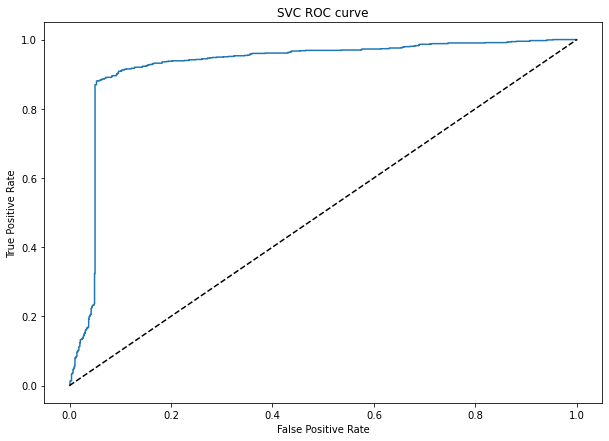

In [151]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, SVC_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('SVC ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

##  6. DecisionTreeClassifier

### Create the Model

In [152]:
dtmodel = DecisionTreeClassifier()

### Train the Model

In [153]:
dtmodel = dtmodel.fit(X_train, y_train)

### Predict on the test dataset

In [154]:
dt_pred = dtmodel.predict(X_test)
dt_prob = dtmodel.predict_proba(X_test)[:,1]

### Model Evaluation

In [155]:
r_dt= recall_score(y_test, dt_pred)
print("recall_score : ", r_dt)

p_dt= precision_score(y_test, dt_pred)
print("precision_score :",p_dt)

f1_dt= f1_score(y_test, dt_pred)
print("f1_score :", f1_dt)

f2_dt = fbeta_score(y_test, dt_pred, beta=2, average='binary')
print("f2_score :", f2_dt)


A_dt= accuracy_score( y_test, dt_pred)
print("accuracy_score :", A_dt)

acu_dt = roc_auc_score(dt_pred, y_test)
print("ROC_AUC Score:",acu_dt)

recall_score :  0.9444444444444444
precision_score : 0.8156565656565656
f1_score : 0.8753387533875339
f2_score : 0.9155328798185941
accuracy_score : 0.8661493695441319
ROC_AUC Score: 0.875219587176109


# Models comparison

In [156]:
compare_models = ['Logistic Regression','Randomforest','XGBClassifier','K Nearest Neighbors','Support Vector Machines','DecisionTreeClassifier']

data={'Accuracy':[A_lgt,A_rf,A_XG,A_KNN,A_SVC,A_dt],'Recall':[r_lgt,r_rf, r_XG,r_KNN,r_SVC,r_dt],'Precision':[p_lgt, p_rf, p_XG,p_KNN,p_SVC,p_dt], 'f1_score':[f1_lgt, f1_rf, f1_XG,f1_KNN,f1_SVC,f1_dt], 'f2_score':[f2_lgt,f2_rf,f2_XG,f2_KNN,f2_SVC,f2_dt],'ROC_AUC':[acu_lgt, acu_rf, acu_XG,acu_KNN,acu_SVC,acu_dt],'Description':['','best model','','','','']}
result=pd.DataFrame(data=data, index=compare_models)
result

,Accuracy,Recall,Precision,f1_score,f2_score,ROC_AUC,Description
Logistic Regression,0.760427,0.793372,0.742701,0.767201,0.782692,0.761620,
Randomforest,0.899612,0.951267,0.861430,0.904122,0.931831,0.903804,best model
XGBClassifier,0.859360,0.928850,0.814530,0.867942,0.903489,0.866346,
K Nearest Neighbors,0.777886,0.864522,0.735489,0.794803,0.835217,0.786553,
Support Vector Machines,0.887973,0.923002,0.861692,0.891294,0.910052,0.889829,
DecisionTreeClassifier,0.866149,0.944444,0.815657,0.875339,0.915533,0.875220,


After train split test the best model is Randomforest. But that won't be the conclusion for the best model unless after cross validation.

# k-Fold cross validation 

## 1. Logistic Regression

In [157]:
kf_lgt = KFold(n_splits =5,shuffle=True)
score = cross_val_score(model, X_train, y_train, cv=kf_lgt, scoring='f1', error_score="raise")
lgt_cv_score = score.mean()
lgt_cv_stdev = stdev(score)
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', lgt_cv_score)
print('Cross Validation f1 standard deviation: ', lgt_cv_stdev)

Cross Validation f1 scores are: [0.77372263 0.78045909 0.75421267 0.77400119 0.76625659]
Average Cross Validation f1 score:  0.7697304342982473
Cross Validation f1 standard deviation:  0.010026836564549


## 2. RandomForest Classifier (Best Model)

In [158]:
kf_RF = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(RF_model, X_train, y_train, cv=kf_RF, scoring='f1', error_score="raise")
RF_cv_score = score.mean()
RF_cv_stdev = stdev(score)
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', RF_cv_score)
print('Cross Validation f1 standard deviation: ', RF_cv_stdev)

Cross Validation f1 scores are: [0.87600459 0.88255416 0.87971698 0.90969163 0.88032691]
Average Cross Validation f1 score:  0.8856588554553403
Cross Validation f1 standard deviation:  0.01363958998612029


## 3. XGBoost Classifier

In [159]:
kf_XG = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(XG_model, X_train, y_train, cv=kf_XG, scoring='f1', error_score="raise")
XG_cv_score = score.mean()
XG_cv_stdev = stdev(score)
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', XG_cv_score)
print('Cross Validation f1 standard deviation: ', XG_cv_stdev)

Cross Validation f1 scores are: [0.84764543 0.84395091 0.85489314 0.84903519 0.85198135]
Average Cross Validation f1 score:  0.8495012025784184
Cross Validation f1 standard deviation:  0.004174055886466435


## 4. K Nearest Neighbors

In [160]:
kf_KNN = KFold(n_splits = 10,shuffle=True)
score = cross_val_score(KNN_model, X_train, y_train, cv=kf_KNN, scoring='f1', error_score="raise")
KNN_cv_score = score.mean()
KNN_cv_stdev = stdev(score)
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', KNN_cv_score)
print('Cross Validation f1 standard deviation: ', KNN_cv_stdev)

Cross Validation f1 scores are: [0.76190476 0.7978022  0.78309232 0.80837004 0.78767877 0.7727797
 0.78611422 0.7654321  0.78297872 0.76222222]
Average Cross Validation f1 score:  0.7808375062673724
Cross Validation f1 standard deviation:  0.01541063640310395


## 5. Support Vector Machines

In [161]:
kf_SVC = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(SVC_model, X_train, y_train, cv=kf_SVC, scoring='f1', error_score="raise")
SVC_cv_score = score.mean()
SVC_cv_stdev = stdev(score)
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', SVC_cv_score)
print('Cross Validation f1 standard deviation: ', SVC_cv_stdev)

Cross Validation f1 scores are: [0.85901249 0.86310905 0.85747801 0.86255345 0.85963891]
Average Cross Validation f1 score:  0.8603583807310962
Cross Validation f1 standard deviation:  0.0023984437330568527


## 6. DecisionTreeClassifier

In [162]:
kf_dt = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(dtmodel, X_train, y_train, cv=kf_dt, scoring='f1', error_score="raise")
dt_cv_score = score.mean()
dt_cv_stdev = stdev(score)
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', dt_cv_score)
print('Cross Validation f1 standard deviation: ', dt_cv_stdev)

Cross Validation f1 scores are: [0.86303725 0.83789954 0.85203797 0.84675615 0.85811193]
Average Cross Validation f1 score:  0.8515685680093071
Cross Validation f1 standard deviation:  0.009805204261523492


In [163]:
com = ['Logistic Regression','Randomforest','XGBClassifier','K Nearest Neighbors','Support Vector Machines','DecisionTreeClassifier']

data={'Average Cross Validation score':[lgt_cv_score,RF_cv_score,XG_cv_score,KNN_cv_score,SVC_cv_score,dt_cv_score],
      'Cross Validation standard deviation':[lgt_cv_stdev,RF_cv_stdev,XG_cv_stdev,KNN_cv_stdev,SVC_cv_stdev,dt_cv_stdev],
      'Description':['','best model','','','','']
     }

result=pd.DataFrame(data=data, index=com)
result.sort_values(ascending=False, by= 'Average Cross Validation score')

,Average Cross Validation score,Cross Validation standard deviation,Description
Randomforest,0.885659,0.013640,best model
Support Vector Machines,0.860358,0.002398,
DecisionTreeClassifier,0.851569,0.009805,
XGBClassifier,0.849501,0.004174,
K Nearest Neighbors,0.780838,0.015411,
Logistic Regression,0.769730,0.010027,


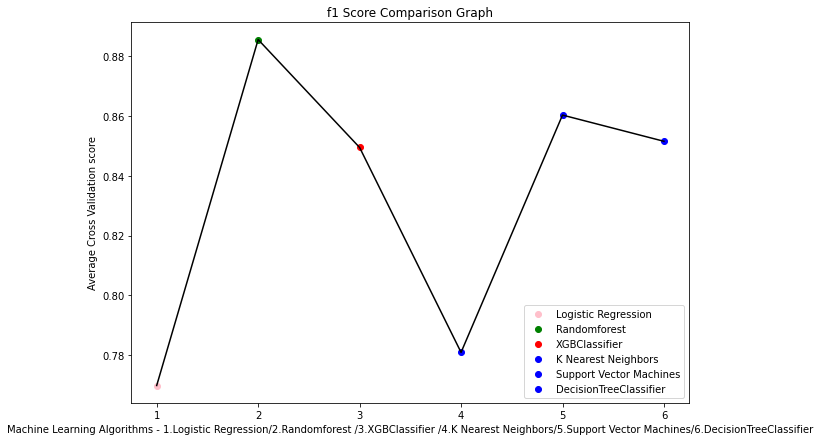

In [164]:
fig, ax = plt.subplots(figsize=(10,7))

plt.title("f1 Score Comparison Graph")

plt.ylabel("Average Cross Validation score")

plt.xlabel("Machine Learning Algorithms - 1.Logistic Regression/2.Randomforest /3.XGBClassifier /4.K Nearest Neighbors/5.Support Vector Machines/6.DecisionTreeClassifier")

x = [lgt_cv_score,RF_cv_score,XG_cv_score,KNN_cv_score,SVC_cv_score,dt_cv_score]

plt.plot([1,2,3,4,5,6],x, color = "black")

plt.scatter(1,lgt_cv_score, marker="o", color="pink", label="Logistic Regression")

plt.scatter(2,RF_cv_score, marker="o", color="green", label="Randomforest")

plt.scatter(3,XG_cv_score, marker="o", color="red", label="XGBClassifier")

plt.scatter(4,KNN_cv_score, marker="o", color = "blue",label = "K Nearest Neighbors")

plt.scatter(5,SVC_cv_score, marker="o", color = "blue",label = "Support Vector Machines")

plt.scatter(6,dt_cv_score, marker="o", color = "blue",label = "DecisionTreeClassifier")

plt.legend()

plt.show()

From the graph Randomforest is the best average cross validation score and also the best performing model.

# Model Improvement

# Hyperparameters tuning

# TOP 3 MODELS

1. RandomForerestClassifier
2. Support Vector Machine
3. DecisionTree Classifier



## 1. RandomForest Classifier

In [165]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree
max_depth = [2,4,10, None]
 
# minimum number of samples required to split a node
min_samples_split = [2,5]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

# Method of selecting Samples for training each tree
bootstrap = [True]

In [166]:
# create param grid

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [15, 22, 29, 36, 43, 51, 58, 65, 72, 80], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}


In [167]:
# make GridSearchCV object
rf_Grid = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = kf_RF, verbose = 2 , n_jobs = -1, scoring='f1')

In [168]:
rf_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 4, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [15, 22, 29, 36, 43, 51, 58, 65, 72,
                                          80]},
             scoring='f1', verbose=2)

In [169]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 22}

In [191]:
RF_model_tuned = RandomForestClassifier(bootstrap = True,
                                    max_depth = None,
                                    max_features = 'auto',
                                    min_samples_leaf = 1,
                                    min_samples_split =  2,
                                    n_estimators = 22)
# RF_model_tuned = RandomForestClassifier()

In [192]:
# performance evaluation the test data

RF_model_tuned.fit(X_train, y_train)
y_pred_grid = RF_model_tuned.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       928
           1       0.95      0.86      0.90      1134

    accuracy                           0.90      2062
   macro avg       0.90      0.90      0.90      2062
weighted avg       0.91      0.90      0.90      2062



There is not much difference in the model performance after hyperparameter tuning

# 2. Support Vector Machine

In [172]:
# create param grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]} 

In [173]:
# make  GridSearchCV object
grid = GridSearchCV(SVC_model,
                    param_grid,
                    cv = kf_SVC,
                    refit=True,verbose=2,scoring = 'f1')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=  44.5s
[CV] END .....................................C=0.1, gamma=1; total time=  43.7s
[CV] END .....................................C=0.1, gamma=1; total time=  44.0s
[CV] END .....................................C=0.1, gamma=1; total time=  43.1s
[CV] END .....................................C=0.1, gamma=1; total time=  44.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=  27.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=  29.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=  30.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=  31.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=  28.8s
[CV] END ..................................C=0.1, gamma=0.01; total time=  31.4s
[CV] END ..................................C=0.1

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(C=51, gamma=1, probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='f1', verbose=2)

In [212]:
print(grid.best_estimator_) 

SVC(C=10, gamma=1, probability=True)


In [211]:
grid_predictions = grid.predict(X_test)

In [210]:
# performance evaluation on test data
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1036
           1       0.86      0.92      0.89      1026

    accuracy                           0.89      2062
   macro avg       0.89      0.89      0.89      2062
weighted avg       0.89      0.89      0.89      2062



There is not much difference in the model performance after hyperparameter tuning

# 3. DecisionTree Classifier

In [177]:
depth = np.arange(1,50)
leaves = [1,2,4,5,10,20,30,40,80,150]

In [178]:
# create the parameter grid

params = {
          'max_depth':depth,
          'min_samples_leaf':leaves,
          'min_samples_split':[2,3,4,5],
          'criterion':['gini','entropy'] 
}

In [179]:
# make  GridSearchCV object
grid_search = GridSearchCV(estimator = dtmodel, 
                           param_grid = params, 
                           cv = kf_dt, verbose = 1, scoring = 'f1', n_jobs = -1)

In [180]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 3920 candidates, totalling 19600 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': [1, 2, 4, 5, 10, 20, 30, 40, 80,
                                              150],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='f1', verbose=1)

In [181]:
score = pd.DataFrame(grid_search.cv_results_)
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018145,0.003082,0.006437,0.004473,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.723714,0.735361,0.731532,0.728271,0.742334,0.732242,0.006334,3841
1,0.016104,0.004215,0.008044,0.003113,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.723714,0.735361,0.731532,0.728271,0.742334,0.732242,0.006334,3841
2,0.016022,0.002726,0.007312,0.004687,gini,1,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.723714,0.735361,0.731532,0.728271,0.742334,0.732242,0.006334,3841
3,0.015316,0.004491,0.009657,0.000814,gini,1,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.723714,0.735361,0.731532,0.728271,0.742334,0.732242,0.006334,3841
4,0.012120,0.003164,0.008080,0.003132,gini,1,2,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.723714,0.735361,0.731532,0.728271,0.742334,0.732242,0.006334,3841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,0.043918,0.004503,0.008473,0.003218,entropy,49,80,5,"{'criterion': 'entropy', 'max_depth': 49, 'min...",0.787429,0.788304,0.738012,0.779904,0.783019,0.775334,0.018907,1754
3916,0.041942,0.004282,0.004448,0.004677,entropy,49,150,2,"{'criterion': 'entropy', 'max_depth': 49, 'min...",0.771891,0.778291,0.741806,0.781358,0.778157,0.770300,0.014576,2555
3917,0.039950,0.000862,0.006051,0.004220,entropy,49,150,3,"{'criterion': 'entropy', 'max_depth': 49, 'min...",0.771891,0.778291,0.741806,0.781358,0.778157,0.770300,0.014576,2555
3918,0.038494,0.003405,0.006608,0.001875,entropy,49,150,4,"{'criterion': 'entropy', 'max_depth': 49, 'min...",0.771891,0.778291,0.741806,0.781358,0.778157,0.770300,0.014576,2555


In [182]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 36,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [183]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=36)

In [193]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=36, min_samples_leaf=1,
                       min_samples_split=2)

In [194]:
# performance evaluation on test data
dt.fit(X_train, y_train)
y_pred_grid_dt = dt.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       928
           1       0.95      0.86      0.90      1134

    accuracy                           0.90      2062
   macro avg       0.90      0.90      0.90      2062
weighted avg       0.91      0.90      0.90      2062



There is a difference in the model performance after hyperparameter tuning. The model F1 score increased after tuning

# Using Confusion Matrix For Predictions


# TOP 3 MODELS

1. RandomForerestClassifier
2. Support Vector Machine
3. DecisionTree Classifier



# 1. RandomForerestClassifier

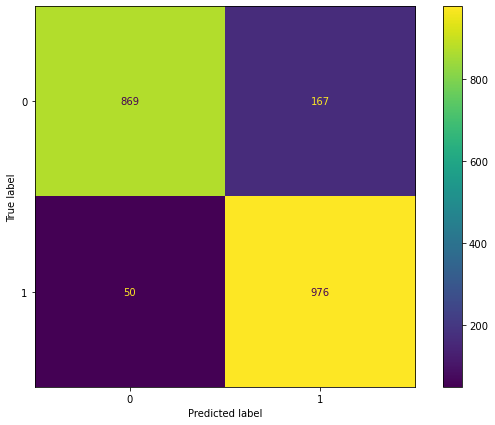

In [186]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
y_pred_RF = rf_Grid.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF, labels=rf_Grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_Grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:

1. We successfully predicted 869 customers who don't churn and 976 who churn
2. There are 167 customers who are predicted to churn when they actually won't
3. There are 50 customers who are predicted to not churn when they actually churn

# 2. Support Vector Machine

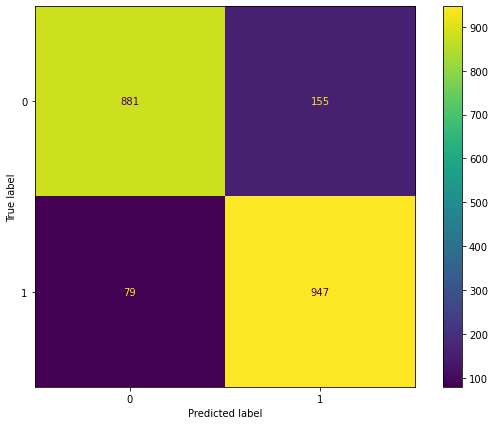

In [209]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
y_pred_SVC = grid.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVC, labels=grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:

1. We successfully predicted 881 customers who don't churn and 947 who churn
2. There are 155 customers who are predicted to churn when they actually won't
3. There are 79 customers who are predicted to not churn when they actually churn

# 3. DecisionTree Classifier

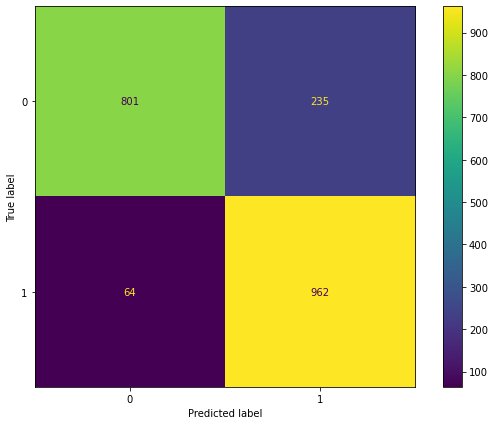

In [188]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred_dt = grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dt, labels=grid_search.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_search.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:

1. We successfully predicted 801 customers who don't churn and 962 who churn
2. There are 235 customers who are predicted to churn when they actually won't
3. There are 64 customers who are predicted to not churn when they actually churn

# Feature Importance

# 1.  RandomforestClassifier 

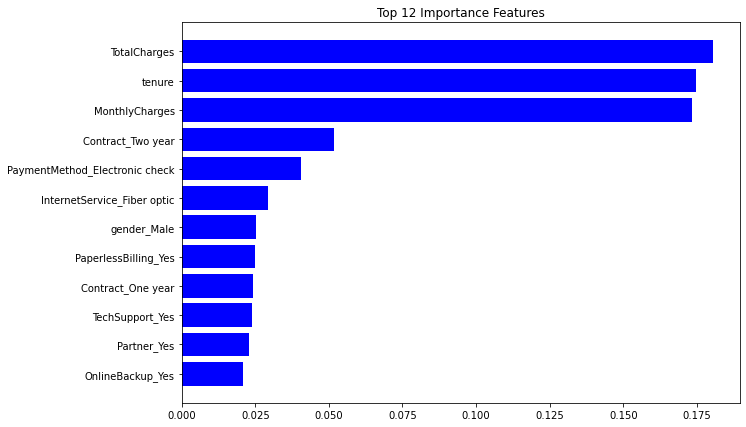

In [199]:
coeffs = RF_model_tuned.feature_importances_
list_of_coeffs = list(sorted(zip(coeffs, X_train.columns), reverse=True))
x_val = [x[0] for x in list_of_coeffs[:12]]
y_val = [x[1] for x in list_of_coeffs[:12]]

#create figure
plt.figure(figsize=(10,7))
plt.barh( y_val, x_val, align='center', color='blue')
plt.title('Top 12 Importance Features')
plt.gca().invert_yaxis() # first with higest contributed one 
plt.show()

# 2.  DecisionTreeClassifier

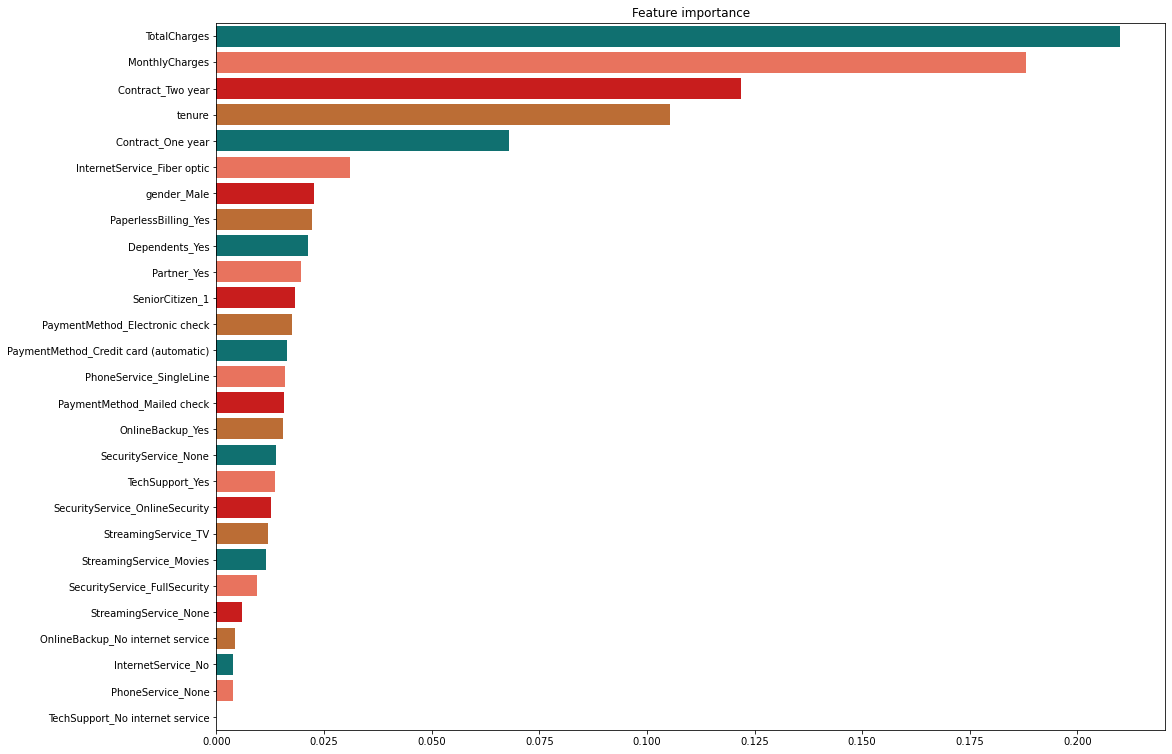

In [217]:
fimp = pd.Series(data=dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')


# Conclusion

we have walked through a complete end-to-end machine learning project using the Telco customer Churn dataset. We started by 

cleaning the data and analyzing it with visualization. Then, to be able to build a machine learning model, we transformed the 

categorical data into numeric variables (feature engineering). After transforming the data, we tried 6 different machine 

learning algorithms using default parameters.

Looking at model results, the best Precision on the test set is achieved by  RandomForest Classifier with 0.89 . 

Given the high imbalance of the data towards non-churners, it makes sense to compare F1 scores to get the model with the best 

score on jointly precision and recall. This would also be the  RandomForest Classifier with a F1 score of 0.90 .

Given the scores of the best performing models, it can be observed that F1 scores are not much above 90%. 

Further optimization efforts should be carried out to achieve a higher scores and thereby increase prediction power for more 

business value.

When we consider the Exploratory Data Analysis we did, it is clear that this company has some issue with their Month-to-month

customers.

What kind of incentives can this company offer to customers to get them to sign One-year or Two-year contracts?

What adjustments can be made to Month-to-Month contracts that would be more favorable to customers, without taking away the

appeal of a One-year or Two-year contract?

For RandomForest Classifier, you can see TotalCharges has a positive influence on the data and some features like

InternetService_fibreoptics,contract_one year and etc should be examine critically since it has negative impact on the target column.

 Recommendation and Request

We should pay more attention to customers who meet the criteria below

1. Contract: Month-to-month
2. Tenure: Short tenure
3. Internet service: Fiber optic
4. Payment method: Electronic check